In [2]:
import cv2
import numpy as np

# 检测work_dirs/three_seg_head中以gt_line_type开头的文件，保存为伪彩色图像的名字
import os
path = 'work_dirs/three_seg_head'
files = os.listdir(path)
for file in files:
    if file.startswith('gt_line_type'):
        gray_image = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)
        color_image = cv2.applyColorMap(gray_image, cv2.COLORMAP_JET)
        color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
        cv2.imwrite(os.path.join(path, 'colorgt' + file) ,color_image_rgb)
        pred_gray=file.replace('gt_line_type', 'pred_line_type')
        pred_gray=os.path.join(path, pred_gray)
        gray_image = cv2.imread(pred_gray, cv2.IMREAD_GRAYSCALE)
        color_image = cv2.applyColorMap(gray_image, cv2.COLORMAP_JET)
        color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
        cv2.imwrite(os.path.join(path, 'colorpred' + file), color_image_rgb)

# # 读取灰度图像
# gray_image = cv2.imread('work_dirs/three_seg_head/gt_line_type-Cities1to30_30cm_BBA_BGRN_22Q1_1303000100033_8_8_512_1024_1024_1536.png', cv2.IMREAD_GRAYSCALE)

# # 使用 applyColorMap 函数生成伪彩色图像
# color_image = cv2.applyColorMap(gray_image, cv2.COLORMAP_JET)

# # 可选：如果希望将伪彩色图像转换为 RGB 彩色图像，可以使用 cv2.cvtColor 函数
# color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

# 显示灰度图像和伪彩色图像，使用 matplotlib 显示

def show_image(gray_image, color_image_rgb):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Gray Image')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(color_image_rgb)
    plt.title('Color Image')
    plt.axis('off')
    plt.show()



(1005, 2)


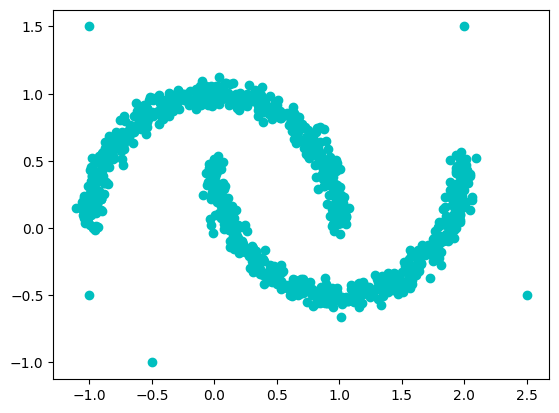

In [1]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

np.random.seed(2021)

data = np.ones([1005,2])
data[:1000] = make_moons(n_samples=1000,noise=0.05,random_state=2022)[0]
data[1000:] = [[-1,-0.5],
                [-0.5,-1],
                [-1,1.5],
                [2.5,-0.5],
                [2,1.5]]
print(data.shape)
plt.scatter(data[:,0],data[:,1],color="c")
plt.show()


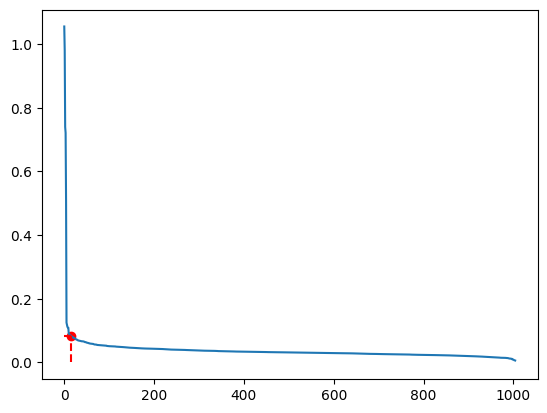

In [5]:
def select_MinPts(data,k):
    k_dist = []
    for i in range(data.shape[0]):
        dist = (((data[i] - data)**2).sum(axis=1)**0.5)
        dist.sort()
        k_dist.append(dist[k])
    return np.array(k_dist)
k = 3  # 此处k取 2*2 -1 
k_dist = select_MinPts(data,k)
k_dist.sort()
plt.plot(np.arange(k_dist.shape[0]),k_dist[::-1])
# 由拐点确定邻域半径
eps = k_dist[::-1][15]
plt.scatter(15,eps,color="r")
plt.plot([0,15],[eps,eps],linestyle="--",color = "r")
plt.plot([15,15],[0,eps],linestyle="--",color = "r")
plt.show()